In [1]:
import os, shutil
import tensorflow as tf
import matplotlib.image as mpimg
import numpy as np

from keras.preprocessing.image import array_to_img, img_to_array, load_img
from os import walk, getcwd
from matplotlib import pyplot as plt
%matplotlib inline

IMAGE_SIZE = 150

# Retorna todos los archivos de un directorio dado
def ls(ruta):  
    return next(walk(ruta))[2]


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Ejecutar sólo una vez, y si el dataset: data_augmentation_dataset no existe

#Definimos origen y destino de datasets y nombres
original_dataset_dir = 'cropped_dataset' #origen
base_dir = 'balanced_dataset'           #destino
os.mkdir(base_dir) #Creamos directorio dataset destino

#Creamos los tres directorios train, validation y test dentro de data_augmentation_dataset
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Creamos las carpetas de las 4 clases dentro de la carpeta train
train_atypical_dir = os.path.join(train_dir, 'Atypical_Lymphocyte')
os.mkdir(train_atypical_dir)
train_blast_dir = os.path.join(train_dir, 'Blast')
os.mkdir(train_blast_dir)
train_lymphocyte_dir = os.path.join(train_dir,'Lymphocyte')
os.mkdir(train_lymphocyte_dir)
train_variant_dir = os.path.join(train_dir,'Variant_Lymphocyte')
os.mkdir(train_variant_dir)

#Creamos las carpetas de las 4 clases dentro de la carpeta validation
validation_atypical_dir = os.path.join(validation_dir, 'Atypical_Lymphocyte')
os.mkdir(validation_atypical_dir)
validation_blast_dir = os.path.join(validation_dir, 'Blast')
os.mkdir(validation_blast_dir)
validation_lymphocyte_dir = os.path.join(validation_dir,'Lymphocyte')
os.mkdir(validation_lymphocyte_dir)
validation_variant_dir = os.path.join(validation_dir,'Variant_Lymphocyte')
os.mkdir(validation_variant_dir)

#Creamos las carpetas de las 4 clases dentro de la carpeta test
test_atypical_dir = os.path.join(test_dir, 'Atypical_Lymphocyte')
os.mkdir(test_atypical_dir)
test_blast_dir = os.path.join(test_dir, 'Blast')
os.mkdir(test_blast_dir)
test_lymphocyte_dir = os.path.join(test_dir,'Lymphocyte')
os.mkdir(test_lymphocyte_dir)
test_variant_dir = os.path.join(test_dir,'Variant_Lymphocyte')
os.mkdir(test_variant_dir)


In [3]:
def transform_img(x):
    from scipy import ndimage
    from scipy import misc

    face = misc.face()
    face = misc.face(gray=True)
    lx, ly = face.shape

    #x = x(gray=True)
    lx, ly, n = x.shape
    
    # Cropping
    crop_face = x[lx // 4: - lx // 4, ly // 4: - ly // 4]

    # up <-> down flip
    flip_ud_face = np.flipud(x)

    # rotation
    rotate_face = ndimage.rotate(x, 45)
    rotate_face_noreshape = ndimage.rotate(x, 45, reshape=False)
    figure
    plt.imshow('rotate', rotate_face, cmap=plt.cm.gray) 
    figure
    plt.imshow('rotate no reshape', rotate_face_noreshape, cmap=plt.cm.gray) 
    return None

In [4]:
def ScaleRotateTranslate(image, angle, center = None, new_center = None, scale = None,expand = False):
    
    if center is None:
        return image.rotate(angle)
    
    angle = -angle/180.0*math.pi
    nx,ny = x,y = center
    sx=sy=1.0
    
    if new_center:
        (nx,ny) = new_center
    if scale:
        (sx,sy) = scale
        
    cosine = math.cos(angle)
    sine = math.sin(angle)
    a = cosine/sx
    b = sine/sx
    c = x-nx*a-ny*b
    d = -sine/sy
    e = cosine/sy
    f = y-nx*d-ny*e
    
    return image.transform(image.size, Image.AFFINE, (a,b,c,d,e,f), resample=Image.BICUBIC)

In [5]:
#Leemos las imagenes a aumentar del dataset original
#Necesitamos aumentar 84 imagenes para Atypical CP --> Trainning y 28  para Atypical CP --> validation
from PIL import Image

subfolders = ['Atypical_Lymphocyte', 'Blast', 'Lymphocyte', 'Variant_Lymphocyte']

for subfolder in subfolders:
    
    orig_dir = os.path.join(original_dataset_dir, 'train', subfolder)# Origen Lectura de datos a aumentar
    if subfolder == 'Atypical_Lymphocyte':
        destino = train_atypical_dir #Destino
        nb_samples = 1000
        nb_samples_aug = 0
    if subfolder == 'Blast':
        destino = train_blast_dir #Destino
        nb_samples = 506
        nb_samples_aug = 494
    if subfolder == 'Lymphocyte':
        destino = train_lymphocyte_dir #Destino
        nb_samples = 568
        nb_samples_aug = 432
    if subfolder == 'Variant_Lymphocyte':
        destino = train_variant_dir #Destino
        nb_samples = 531  
        nb_samples_aug = 469
        
    orig_archives = (ls(ruta = orig_dir))
    aux = 0
    
    for archive in orig_archives:
        #Leemos imagen original
        aux_dir = os.path.join(orig_dir, archive) #Ruta archivo origen + nombre
        #print('Origen: ', aux_dir)
        img = load_img(aux_dir)
        
        if aux < nb_samples:
            #Guardamos imagen original en el nuevo dataset
            dest_dir = os.path.join(destino, archive)
            #print('Destino: ', dest_dir)
            shutil.copyfile(aux_dir, dest_dir)  #copia imagen original desde ruta origen a destino

            if aux < nb_samples_aug:
                #Creamos una nueva imagen y la guardamos
                rotate1_img = img.rotate(180)
                rotate_img = ScaleRotateTranslate(rotate1_img, 15, center = None, new_center = None, scale = True, expand = True)
                new_img = Image.blend(rotate1_img, rotate_img, alpha = 0.1)

                #Guardamos la imagen nueva
                if subfolder == 'Atypical_Lymphocyte':
                    dst_dir = os.path.join(destino, 'atypical_aug.{}.jpg'.format(aux))
                if subfolder == 'Blast':    
                    dst_dir = os.path.join(destino, 'blast_aug.{}.jpg'.format(aux))
                if subfolder == 'Lymphocyte':
                    dst_dir = os.path.join(destino, 'lymphocyte_aug.{}.jpg'.format(aux))
                if subfolder == 'Variant_Lymphocyte':   
                    dst_dir = os.path.join(destino, 'variant_aug.{}.jpg'.format(aux))
                
            #print(dst_dir)
            if subfolder != 'Atypical_Lymphocyte':
                new_img.save(dst_dir)
        aux += 1


In [6]:
subfolders = ['Atypical_Lymphocyte', 'Blast', 'Lymphocyte', 'Variant_Lymphocyte']

for subfolder in subfolders:
    
    orig_dir = os.path.join(original_dataset_dir, 'validation', subfolder)# Origen Lectura de datos a aumentar
    if subfolder == 'Atypical_Lymphocyte':
        destino = validation_atypical_dir #Destino
        nb_samples = 300
        nb_samples_aug = 0
    if subfolder == 'Blast':
        destino = validation_blast_dir #Destino
        nb_samples = 150
        nb_samples_aug = 150
    if subfolder == 'Lymphocyte':
        destino = validation_lymphocyte_dir #Destino
        nb_samples = 150
        nb_samples_aug = 150
    if subfolder == 'Variant_Lymphocyte':
        destino = validation_variant_dir #Destino
        nb_samples = 150  
        nb_samples_aug = 150
        
    orig_archives = (ls(ruta = orig_dir))
    aux = 0
    
    for archive in orig_archives:
        #Leemos imagen original
        aux_dir = os.path.join(orig_dir, archive) #Ruta archivo origen + nombre
        #print('Origen: ', aux_dir)
        img = load_img(aux_dir)
        
        if aux < nb_samples:
            #Guardamos imagen original en el nuevo dataset
            dest_dir = os.path.join(destino, archive)
            #print('Destino: ', dest_dir)
            shutil.copyfile(aux_dir, dest_dir)  #copia imagen original desde ruta origen a destino

        if aux < nb_samples_aug and subfolder != 'Atypical_Lymphocyte':
            #Creamos una nueva imagen y la guardamos
            rotate1_img = img.rotate(180)
            rotate_img = ScaleRotateTranslate(rotate1_img, 15, center = None, new_center = None, scale = True, expand = True)
            new_img = Image.blend(rotate1_img, rotate_img, alpha = 0.1)

            #Guardamos la imagen nueva
            if subfolder == 'Blast':    
                dst_dir = os.path.join(destino, 'blast_aug.{}.jpg'.format(aux))
            if subfolder == 'Lymphocyte':
                dst_dir = os.path.join(destino, 'lymphocyte_aug.{}.jpg'.format(aux))
            if subfolder == 'Variant_Lymphocyte':   
                dst_dir = os.path.join(destino, 'variant_aug.{}.jpg'.format(aux))
                
            new_img.save(dst_dir)
        aux += 1

In [7]:
subfolders = ['Atypical_Lymphocyte', 'Blast', 'Lymphocyte', 'Variant_Lymphocyte']

for subfolder in subfolders:
    
    nb_samples = 300
    orig_dir = os.path.join(original_dataset_dir, 'test', subfolder)# Origen Lectura de datos a aumentar     
    orig_archives = (ls(ruta = orig_dir))
    aux = 0
    
    if subfolder == 'Atypical_Lymphocyte':
        destino = test_atypical_dir #Destino
    if subfolder == 'Blast':
        destino = test_blast_dir #Destino
    if subfolder == 'Lymphocyte':
        destino = test_lymphocyte_dir #Destino
    if subfolder == 'Variant_Lymphocyte':
        destino = test_variant_dir #Destino

    for archive in orig_archives:
        #Leemos imagen original
        aux_dir = os.path.join(orig_dir, archive) #Ruta archivo origen + nombre
        #print('Origen: ', aux_dir)
        img = load_img(aux_dir)
        
        if aux < nb_samples:
            #Guardamos imagen original en el nuevo dataset
            dest_dir = os.path.join(destino, archive)
            #print('Destino: ', dest_dir)
            shutil.copyfile(aux_dir, dest_dir)  #copia imagen original desde ruta origen a destino           
    aux += 1

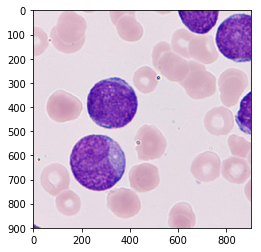

In [125]:
plt.imshow(img)
# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images

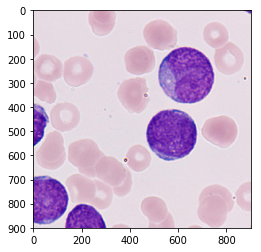

In [126]:
plt.imshow(rotate1_img)

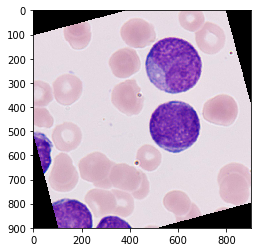

In [127]:
plt.imshow(rotate_img)

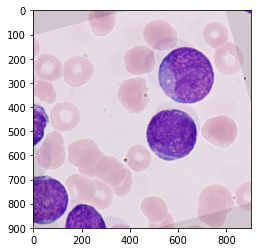

In [128]:
plt.imshow(new_img)
# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images

In [8]:
folders= ['train', 'validation', 'test']

for folder in folders:
    dest_dir = os.path.join(base_dir, folder, 'Atypical_Lymphocyte')
    archives = (ls(ruta = dest_dir))
    print(dest_dir)
    a=len(archives)
    
    dest_dir = os.path.join(base_dir, folder, 'Blast')
    archives = (ls(ruta = dest_dir))
    print(dest_dir)
    b=len(archives)
    
    dest_dir = os.path.join(base_dir, folder, 'Lymphocyte')
    archives = (ls(ruta = dest_dir))
    print(dest_dir)
    c=len(archives)

    dest_dir = os.path.join(base_dir, folder, 'Variant_Lymphocyte')
    archives = (ls(ruta = dest_dir))
    print(dest_dir)
    d=len(archives)
    print(a, b, c, d)

balanced_dataset/train/Atypical_Lymphocyte
balanced_dataset/train/Blast
balanced_dataset/train/Lymphocyte
balanced_dataset/train/Variant_Lymphocyte
1000 1000 1000 1000
balanced_dataset/validation/Atypical_Lymphocyte
balanced_dataset/validation/Blast
balanced_dataset/validation/Lymphocyte
balanced_dataset/validation/Variant_Lymphocyte
300 300 300 300
balanced_dataset/test/Atypical_Lymphocyte
balanced_dataset/test/Blast
balanced_dataset/test/Lymphocyte
balanced_dataset/test/Variant_Lymphocyte
300 300 300 300
